In [ ]:
#uploadind 12 files from https://www150.statcan.gc.ca/n1/en/catalogue/71M0001X Labour Force Survey: Public Use Microdata File
#12 files with monthly survey results of 2024
from google.colab import files
uploaded = files.upload()

Saving pub0124.csv to pub0124 (1).csv
Saving pub0224.csv to pub0224 (1).csv
Saving pub0324.csv to pub0324 (1).csv
Saving pub0424.csv to pub0424 (1).csv
Saving pub0524.csv to pub0524 (1).csv
Saving pub0624.csv to pub0624 (1).csv
Saving pub0724.csv to pub0724 (1).csv
Saving pub0824.csv to pub0824 (1).csv
Saving pub0924.csv to pub0924 (1).csv
Saving pub1024.csv to pub1024 (1).csv
Saving pub1124.csv to pub1124 (1).csv
Saving pub1224.csv to pub1224 (1).csv


In [ ]:
import pandas as pd

# Create a list to hold each month's dataframe
dfs = []

for filename in uploaded.keys():
    temp_df = pd.read_csv(filename)
    dfs.append(temp_df)

# Combine all into one
df = pd.concat(dfs, ignore_index=True)

# Quick Check
print(f"Combined shape: {df.shape}")
df.head()


Combined shape: (1343036, 60)


,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,GENDER,MARSTAT,...,LKATADS,LKANSADS,LKOTHERN,PRIORACT,YNOLOOK,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT
0,1,2024,1,1,35,4,5,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,1.0,403
1,2,2024,1,4,24,0,12,NaN,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,140
2,3,2024,1,1,35,0,6,NaN,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,378
3,4,2024,1,4,47,0,4,NaN,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,18,NaN,222
4,5,2024,1,1,10,0,1,2.0,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4,NaN,34


In [ ]:
# Select only needed columns
selected_columns = [
    'AGE_12', 'GENDER', 'MARSTAT', 'PROV', 'CMA', 'EDUC', 'IMMIG',
    'EFAMTYPE', 'LFSSTAT'
]

df = df[selected_columns]


In [ ]:
# Feature Engineering (since we don't have ready values in this source and I assumed that they may be important)

# HAS_CHILDREN
df['HAS_CHILDREN'] = df['EFAMTYPE'].apply(lambda x: 1 if x in [1, 3] else 0)

# SINGLE_PARENT
df['SINGLE_PARENT'] = df['EFAMTYPE'].apply(lambda x: 1 if x == 3 else 0)


In [ ]:
# Create target variables

# Target: 1 = Employed, 0 = Unemployed
df['target'] = df['LFSSTAT'].apply(lambda x: 1 if x == 1 else 0)

# Drop original LFSSTAT (no longer needed)
df = df.drop(columns=['LFSSTAT'])


In [ ]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343036 entries, 0 to 1343035
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   AGE_12         1343036 non-null  int64
 1   GENDER         1343036 non-null  int64
 2   MARSTAT        1343036 non-null  int64
 3   PROV           1343036 non-null  int64
 4   CMA            1343036 non-null  int64
 5   EDUC           1343036 non-null  int64
 6   IMMIG          1343036 non-null  int64
 7   EFAMTYPE       1343036 non-null  int64
 8   HAS_CHILDREN   1343036 non-null  int64
 9   SINGLE_PARENT  1343036 non-null  int64
 10  target         1343036 non-null  int64
dtypes: int64(11)
memory usage: 112.7 MB


In [ ]:
# Simple descriptive statistics
df.describe()

,AGE_12,GENDER,MARSTAT,PROV,CMA,EDUC,IMMIG,EFAMTYPE,HAS_CHILDREN,SINGLE_PARENT,target
count,1.343036e+06,1.343036e+06,1.343036e+06,1.343036e+06,1.343036e+06,1.343036e+06,1.343036e+06,1.343036e+06,1.343036e+06,1.343036e+06,1.343036e+06
mean,7.221398e+00,1.512904e+00,2.872811e+00,3.458015e+01,1.754021e+00,3.464929e+00,2.705839e+00,6.288773e+00,3.719223e-01,1.850003e-01,5.341346e-01
std,3.602448e+00,4.998337e-01,2.174056e+00,1.459781e+01,2.787990e+00,1.630754e+00,5.849267e-01,5.431393e+00,4.833180e-01,3.882979e-01,4.988337e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,1.000000e+00,1.000000e+00,2.400000e+01,0.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,2.000000e+00,2.000000e+00,3.500000e+01,0.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.100000e+01,2.000000e+00,6.000000e+00,4.700000e+01,4.000000e+00,5.000000e+00,3.000000e+00,1.100000e+01,1.000000e+00,0.000000e+00,1.000000e+00
max,1.200000e+01,2.000000e+00,6.000000e+00,5.900000e+01,9.000000e+00,6.000000e+00,3.000000e+00,1.800000e+01,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# Numerical (not for now, were removed) and Categorical columns

cat_cols = ['AGE_12', 'GENDER', 'MARSTAT', 'PROV', 'CMA', 'EDUC', 'IMMIG',
    'EFAMTYPE', 'HAS_CHILDREN', 'SINGLE_PARENT']

In [ ]:
# Unique values in categorical columns
for col in cat_cols + ['HAS_CHILDREN', 'SINGLE_PARENT']:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

AGE_12: 12 unique values
GENDER: 2 unique values
MARSTAT: 6 unique values
PROV: 10 unique values
CMA: 10 unique values
EDUC: 7 unique values
IMMIG: 3 unique values
EFAMTYPE: 18 unique values
HAS_CHILDREN: 2 unique values
SINGLE_PARENT: 2 unique values
HAS_CHILDREN: 2 unique values
SINGLE_PARENT: 2 unique values


In [ ]:
# Target Rate for Categorical Columns

cat_cols = ['AGE_12', 'GENDER', 'MARSTAT', 'PROV', 'CMA', 'EDUC', 'IMMIG',
    'EFAMTYPE', 'HAS_CHILDREN', 'SINGLE_PARENT']

for col in cat_cols:
    rates = df.groupby(col)['target'].mean()
    print(f"\n{col}:\n{rates}")



AGE_12:
AGE_12
1     0.351773
2     0.640788
3     0.738610
4     0.746563
5     0.763617
6     0.786376
7     0.786193
8     0.756865
9     0.667257
10    0.484962
11    0.250712
12    0.073607
Name: target, dtype: float64

GENDER:
GENDER
1    0.575717
2    0.494645
Name: target, dtype: float64

MARSTAT:
MARSTAT
1    0.539093
2    0.677050
3    0.111503
4    0.571930
5    0.437496
6    0.561304
Name: target, dtype: float64

PROV:
PROV
10    0.500786
11    0.542323
12    0.500062
13    0.497090
24    0.536589
35    0.530158
46    0.555792
47    0.564038
48    0.566577
59    0.533780
Name: target, dtype: float64

CMA:
CMA
0    0.523290
1    0.565093
2    0.555592
3    0.564254
4    0.547180
5    0.522858
6    0.562315
7    0.582971
8    0.551696
9    0.552526
Name: target, dtype: float64

EDUC:
EDUC
0    0.174677
1    0.308359
2    0.483398
3    0.522806
4    0.577896
5    0.650367
6    0.661901
Name: target, dtype: float64

IMMIG:
IMMIG
1    0.649023
2    0.518788
3    0.527309
Name: 

In [ ]:
# See Unique Values for All Categorical Features

# Define categorical columns again
cat_cols = ['AGE_12', 'GENDER', 'MARSTAT', 'PROV', 'CMA', 'EDUC', 'IMMIG',
    'EFAMTYPE', 'HAS_CHILDREN', 'SINGLE_PARENT']

# Loop through each categorical column
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: AGE_12
[ 5 12  6  4  1 10  3  7 11  2  8  9]

Column: GENDER
[1 2]

Column: MARSTAT
[1 6 2 5 3 4]

Column: PROV
[35 24 47 10 12 59 48 46 13 11]

Column: CMA
[4 0 2 8 6 5 7 1 3 9]

Column: EDUC
[5 2 4 6 1 0 3]

Column: IMMIG
[2 3 1]

Column: EFAMTYPE
[ 3 11  1 18  4  2  5  8  6  7 14 10  9 12 16 15 17 13]

Column: HAS_CHILDREN
[1 0]

Column: SINGLE_PARENT
[1 0]


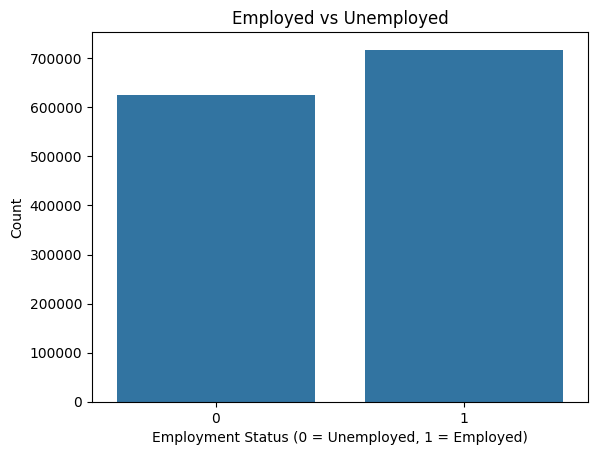

In [ ]:
# Check employed/unemployed ratio

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Employed vs Unemployed')
plt.xlabel('Employment Status (0 = Unemployed, 1 = Employed)')
plt.ylabel('Count')
plt.show()


In [ ]:
# Label Encoding

## See Unique Values for All Categorical Features Again After Cleaning

# Define categorical columns again
cat_cols = ['AGE_12', 'GENDER', 'MARSTAT', 'PROV', 'CMA', 'EDUC', 'IMMIG',
    'EFAMTYPE', 'HAS_CHILDREN', 'SINGLE_PARENT']

# Loop through each categorical column
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())

#----> Already encoded!


Column: AGE_12
[ 5 12  6  4  1 10  3  7 11  2  8  9]

Column: GENDER
[1 2]

Column: MARSTAT
[1 6 2 5 3 4]

Column: PROV
[35 24 47 10 12 59 48 46 13 11]

Column: CMA
[4 0 2 8 6 5 7 1 3 9]

Column: EDUC
[5 2 4 6 1 0 3]

Column: IMMIG
[2 3 1]

Column: EFAMTYPE
[ 3 11  1 18  4  2  5  8  6  7 14 10  9 12 16 15 17 13]

Column: HAS_CHILDREN
[1 0]

Column: SINGLE_PARENT
[1 0]


In [ ]:
# EDA

# Missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 AGE_12           0
GENDER           0
MARSTAT          0
PROV             0
CMA              0
EDUC             0
IMMIG            0
EFAMTYPE         0
HAS_CHILDREN     0
SINGLE_PARENT    0
target           0
dtype: int64



Value counts for AGE_12:

AGE_12
12    235194
10    118137
11    108116
6     106973
5     106886
4     103509
9     101012
8      98542
7      97672
3      90367
1      90186
2      86442
Name: count, dtype: int64


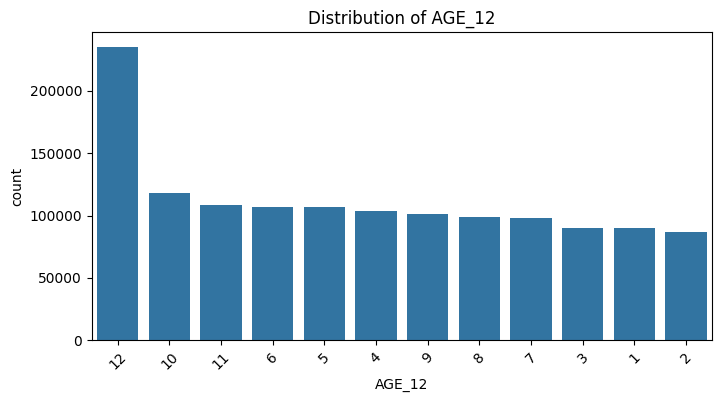


Value counts for GENDER:

GENDER
2    688848
1    654188
Name: count, dtype: int64


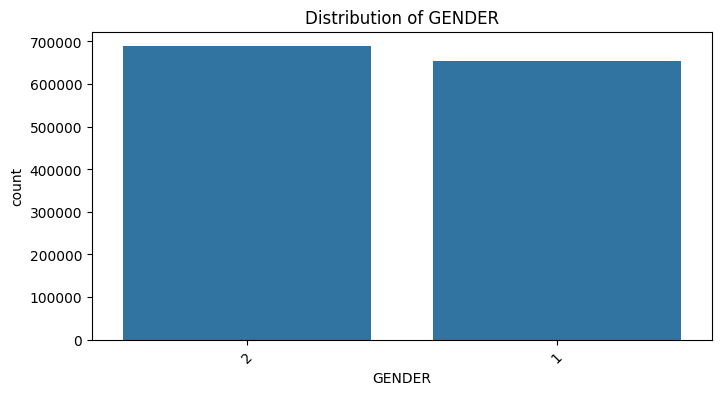


Value counts for MARSTAT:

MARSTAT
1    645781
6    369231
2    156303
3     71245
5     68876
4     31600
Name: count, dtype: int64


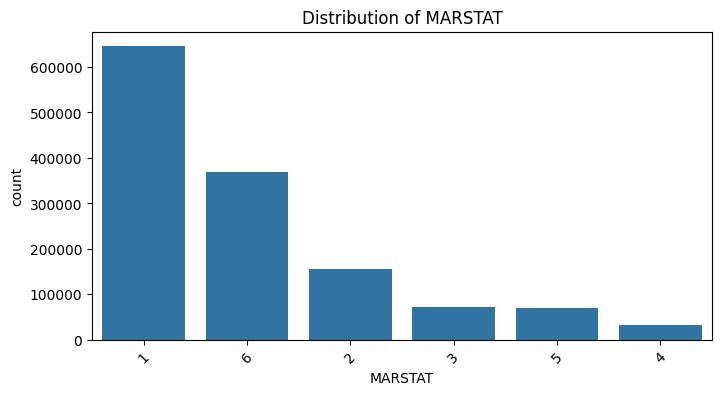


Value counts for PROV:

PROV
35    437204
24    246401
59    167539
48    101049
46     92997
47     77798
13     66326
12     64318
10     60401
11     29003
Name: count, dtype: int64


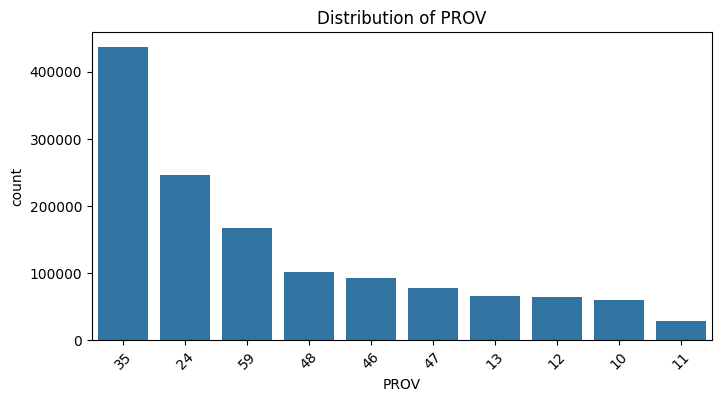


Value counts for CMA:

CMA
0    863303
4    139963
9     77086
2     75910
6     51368
5     28612
1     28075
8     27091
3     26800
7     24828
Name: count, dtype: int64


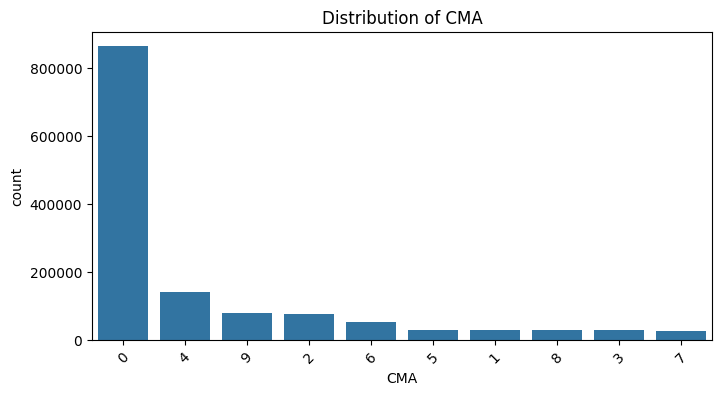


Value counts for EDUC:

EDUC
4    445312
2    257198
5    247700
1    142425
6    126454
3     72744
0     51203
Name: count, dtype: int64


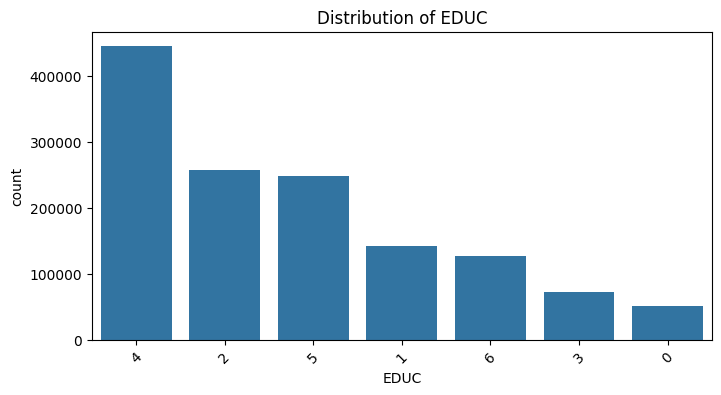


Value counts for IMMIG:

IMMIG
3    1038292
2     214419
1      90325
Name: count, dtype: int64


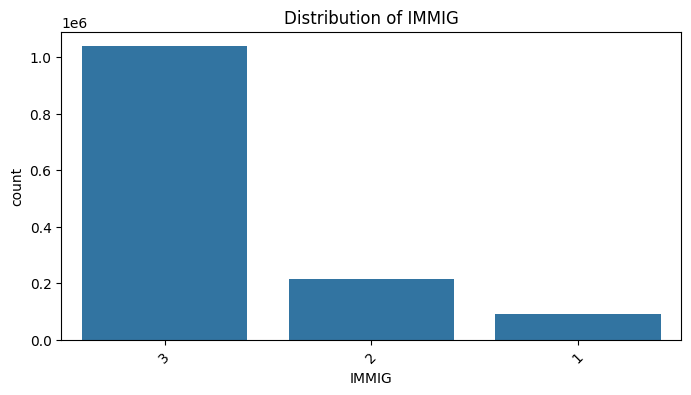


Value counts for EFAMTYPE:

EFAMTYPE
1     251043
3     248462
11    187446
2     170127
18    114210
5      67814
4      66883
6      56111
8      48875
14     41876
9      18396
15     18101
7      14091
16     12234
10      9050
12      8650
17      4929
13      4738
Name: count, dtype: int64


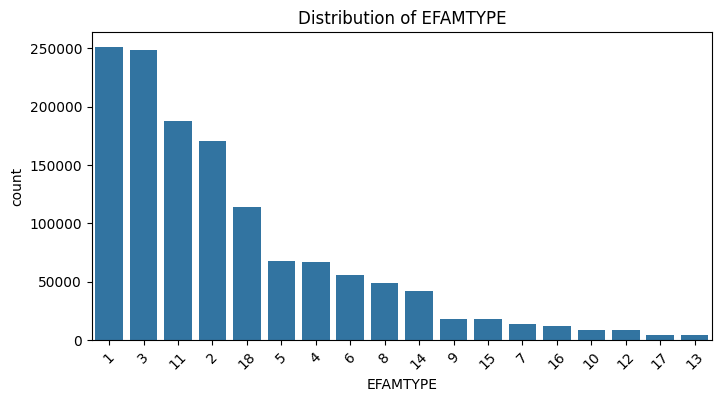


Value counts for HAS_CHILDREN:

HAS_CHILDREN
0    843531
1    499505
Name: count, dtype: int64


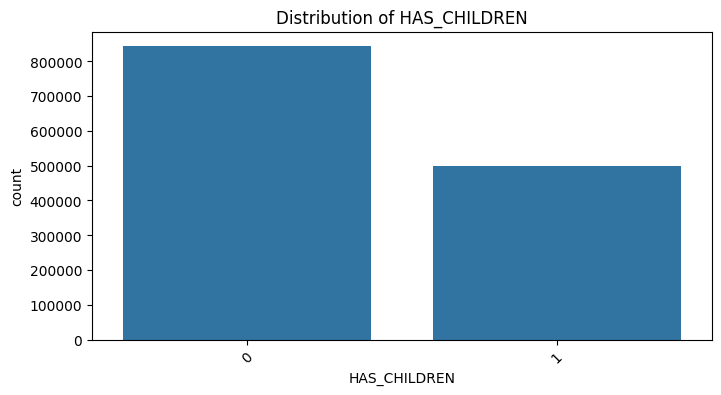


Value counts for SINGLE_PARENT:

SINGLE_PARENT
0    1094574
1     248462
Name: count, dtype: int64


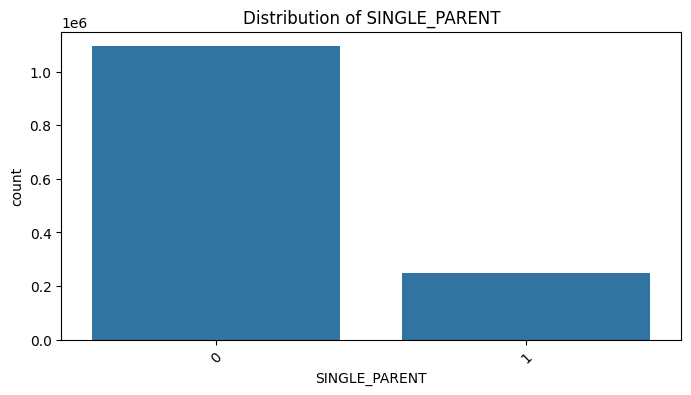

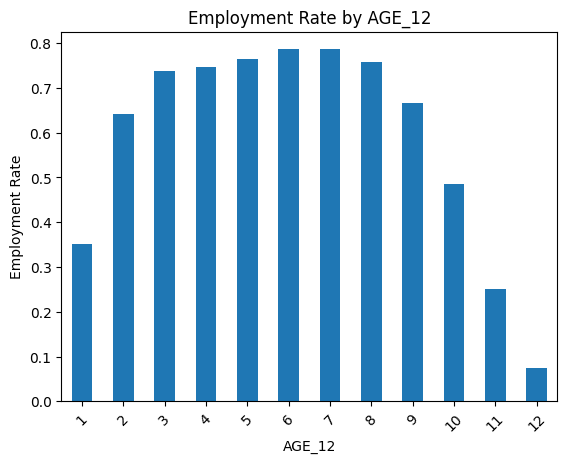

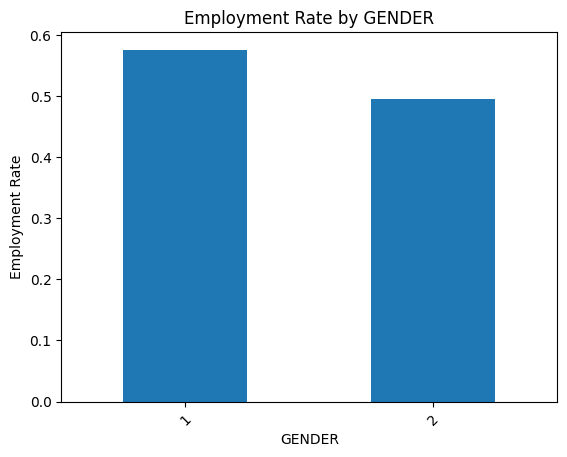

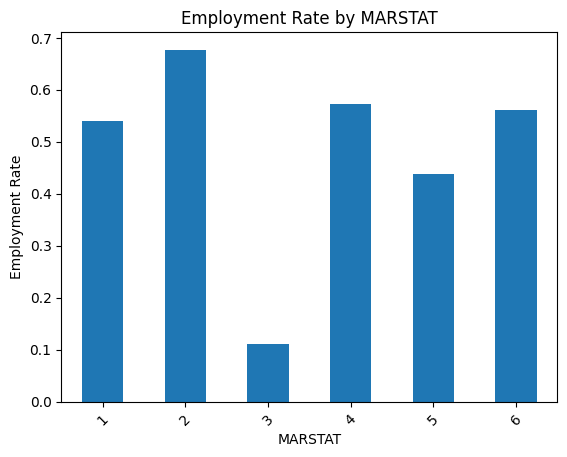

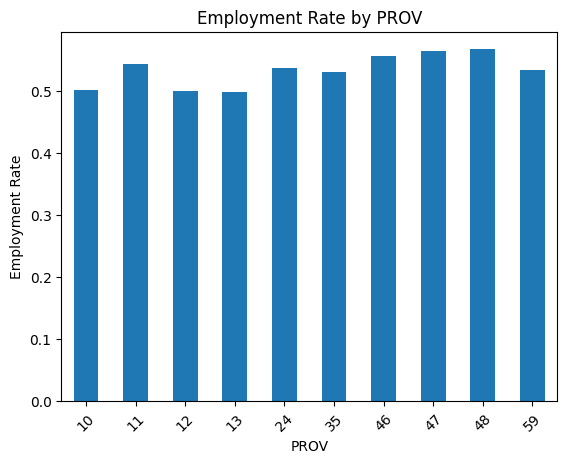

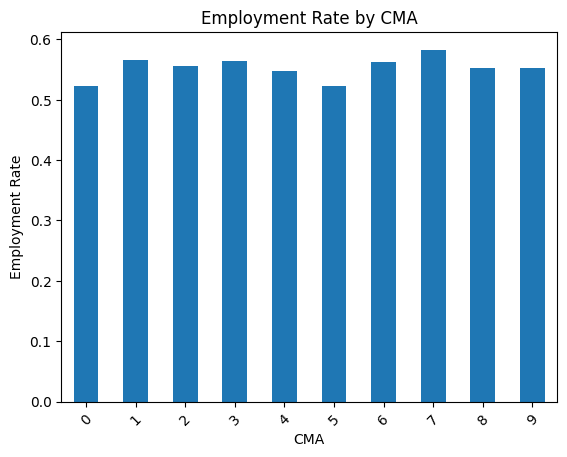

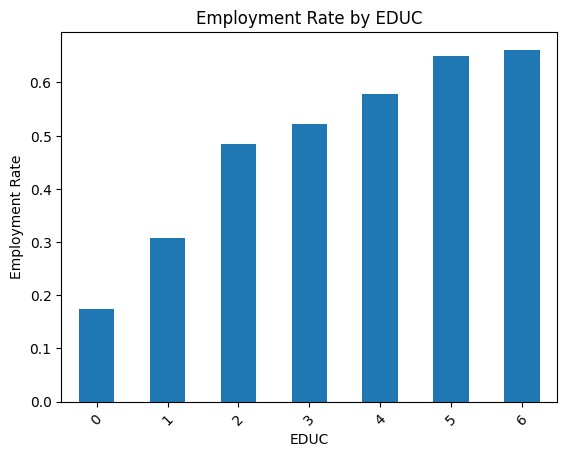

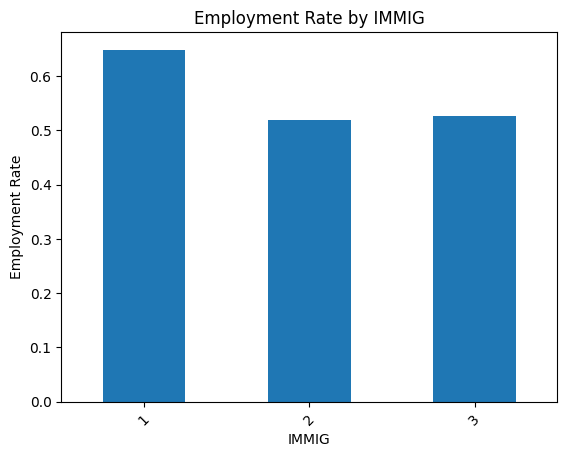

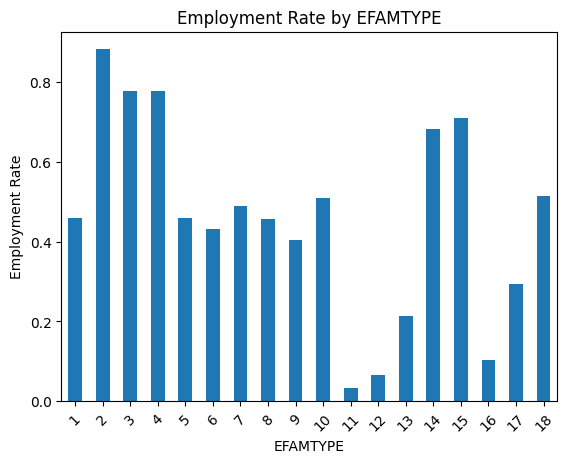

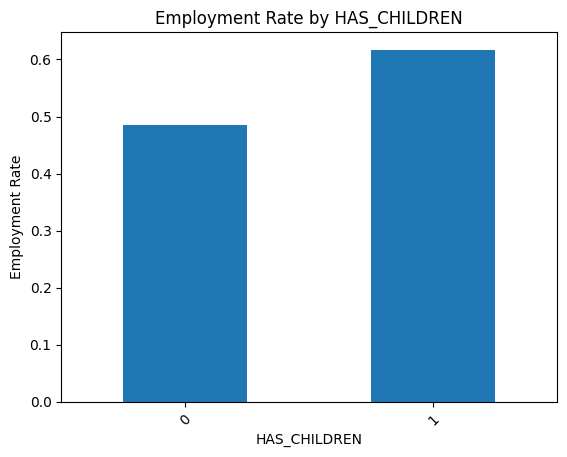

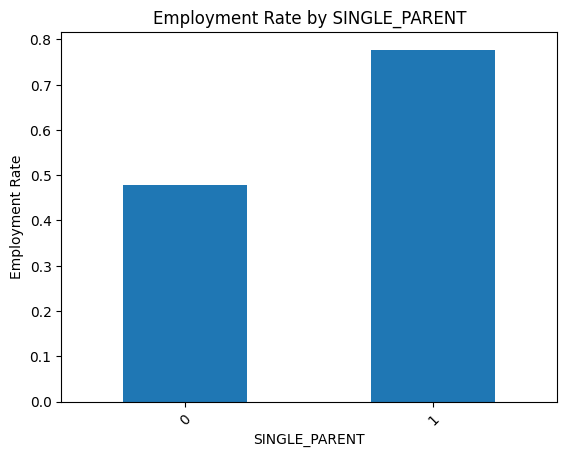

In [ ]:
# Categorical columns
cat_cols = ['AGE_12', 'GENDER', 'MARSTAT', 'PROV', 'CMA', 'EDUC', 'IMMIG',
    'EFAMTYPE', 'HAS_CHILDREN', 'SINGLE_PARENT']

# Value counts and plots
for col in cat_cols:
    print(f"\nValue counts for {col}:\n")
    print(df[col].value_counts())

    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Categorical vs Target: Employment rate by category
for col in cat_cols:
    employment_rate = df.groupby(col)['target'].mean()
    employment_rate.plot(kind='bar')
    plt.title(f'Employment Rate by {col}')
    plt.ylabel('Employment Rate')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Grouping smaller CMA to a bigger group, because original data set has appr 80% of 1 group - zero
# Create a new column 'CMA_GROUPED'
# 0 = Rural (CMA == 0), 1 = Urban (CMA > 0)
df['CMA_GROUPED'] = df['CMA'].apply(lambda x: 0 if x == 0 else 1)

# Drop the original CMA if you want
df = df.drop(columns=['CMA'])

# Now add 'CMA_GROUPED' to features
features = [
    'AGE_12', 'GENDER', 'MARSTAT', 'PROV', 'EDUC', 'IMMIG',
    'SINGLE_PARENT', 'HAS_CHILDREN',  # Optional
    'CMA_GROUPED'  # ✅ New feature: Rural vs Urban
]

X = df[features]
y = df['target']

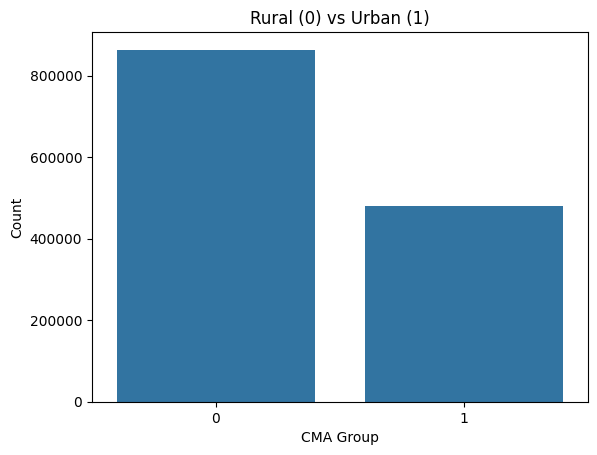

CMA_GROUPED
0    64.27996
1    35.72004
Name: proportion, dtype: float64


In [ ]:
# Check New Distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='CMA_GROUPED', data=df)
plt.title('Rural (0) vs Urban (1)')
plt.xlabel('CMA Group')
plt.ylabel('Count')
plt.show()

# Percentages
print(df['CMA_GROUPED'].value_counts(normalize=True) * 100)

In [ ]:
# Train-Test Split

from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['target'])
y = df['target']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (1074428, 10), Test size: (268608, 10)


In [ ]:
# Train XGBoost Classifier

from xgboost import XGBClassifier

# Clean version
model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'  # Keep this!
)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

<Figure size 1200x800 with 0 Axes>

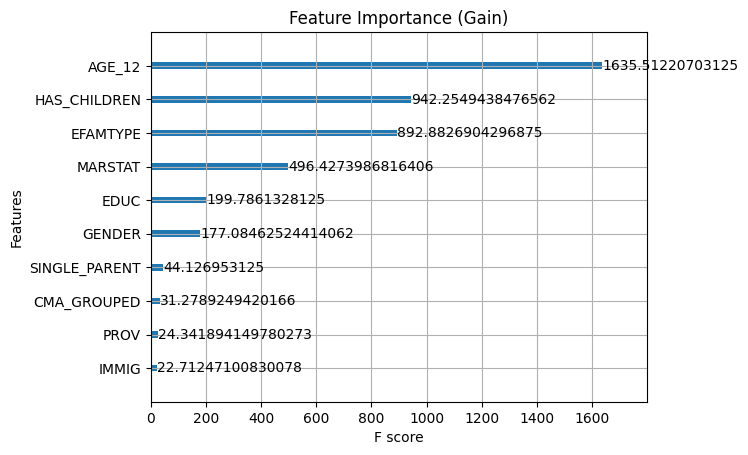

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(12, 8))
plot_importance(model, importance_type='gain', max_num_features=15)
plt.title('Feature Importance (Gain)')
plt.show()


In [ ]:
# Get feature importance scores as a dictionary
importance_dict = model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame for easier viewing
import pandas as pd

importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
})

# Sort by Importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display
importance_df

,Feature,Importance
0,AGE_12,1635.512207
1,HAS_CHILDREN,942.254944
2,EFAMTYPE,892.882690
3,MARSTAT,496.427399
4,EDUC,199.786133
5,GENDER,177.084625
6,SINGLE_PARENT,44.126953
7,CMA_GROUPED,31.278925
8,PROV,24.341894
9,IMMIG,22.712471


In [ ]:
# Evaluate Model: Accuracy, Precision, Recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on test set
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Full classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy:  0.8513
Precision: 0.8231
Recall:    0.9192
F1 Score:  0.8685

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.77      0.83    125135
           1       0.82      0.92      0.87    143473

    accuracy                           0.85    268608
   macro avg       0.86      0.85      0.85    268608
weighted avg       0.86      0.85      0.85    268608



DATA LEAKAGE! Here I just realized that employment history features are available only for employed, hence were excluded after all cleaning tricks.
So I will have to drop them and then restore data from before outliers removal.

In [ ]:
# 1. Get Employability Probability
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of being employed

# 2. Define Mapping Function
def map_employability(prob):
    if prob >= 0.75:
        return "High Employability", "Job Search Support (Resume, Interview Prep)"
    elif prob >= 0.5:
        return "Moderate Employability", "Skills Training or Certification Program"
    else:
        return "Low Employability", "Intensive Case Management and Career Counselling"

# 3. Apply to All Clients
recommendations = [map_employability(prob) for prob in y_probs]

# 4. Create a DataFrame with Predictions
import pandas as pd

results_df = pd.DataFrame({
    'Employability_Probability': y_probs,
    'Employability_Group': [rec[0] for rec in recommendations],
    'Service_Recommendation': [rec[1] for rec in recommendations]
})

# Example
results_df.head(10)


,Employability_Probability,Employability_Group,Service_Recommendation
0,0.859425,High Employability,"Job Search Support (Resume, Interview Prep)"
1,0.008707,Low Employability,Intensive Case Management and Career Counselling
2,0.000326,Low Employability,Intensive Case Management and Career Counselling
3,0.938417,High Employability,"Job Search Support (Resume, Interview Prep)"
4,0.930514,High Employability,"Job Search Support (Resume, Interview Prep)"
5,0.760308,High Employability,"Job Search Support (Resume, Interview Prep)"
6,0.637519,Moderate Employability,Skills Training or Certification Program
7,0.393980,Low Employability,Intensive Case Management and Career Counselling
8,0.905782,High Employability,"Job Search Support (Resume, Interview Prep)"
9,0.563411,Moderate Employability,Skills Training or Certification Program


Accuracy:  0.8513
Precision: 0.8231
Recall:    0.9192
F1 Score:  0.8685
ROC AUC:   0.9150

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.77      0.83    125135
           1       0.82      0.92      0.87    143473

    accuracy                           0.85    268608
   macro avg       0.86      0.85      0.85    268608
weighted avg       0.86      0.85      0.85    268608



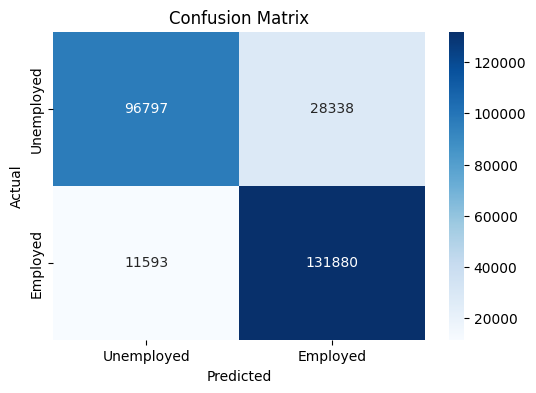

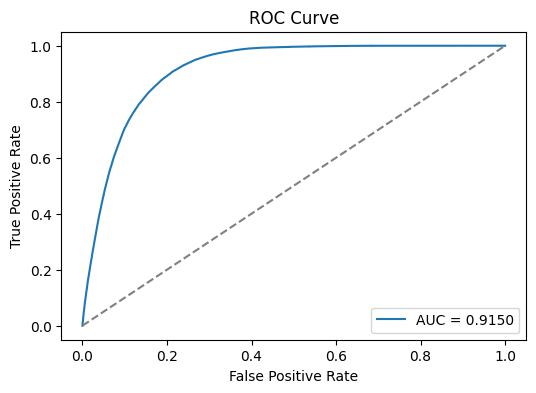

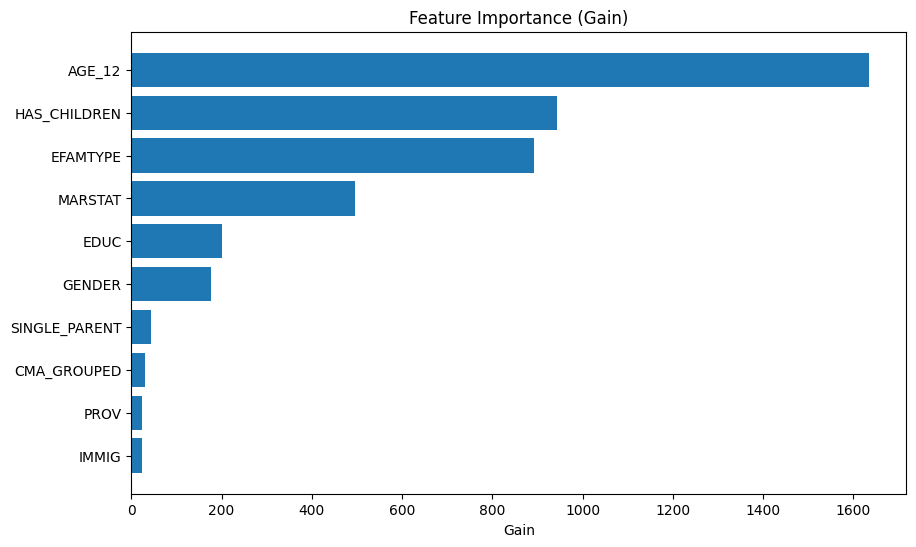

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Predictions and Probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 2. Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unemployed', 'Employed'], yticklabels=['Unemployed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 5. Feature Importance (XGBoost Built-in)
importances = model.get_booster().get_score(importance_type='gain')
importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

features, scores = zip(*importances)
plt.figure(figsize=(10, 6))
plt.barh(features, scores)
plt.xlabel('Gain')
plt.title('Feature Importance (Gain)')
plt.gca().invert_yaxis()
plt.show()


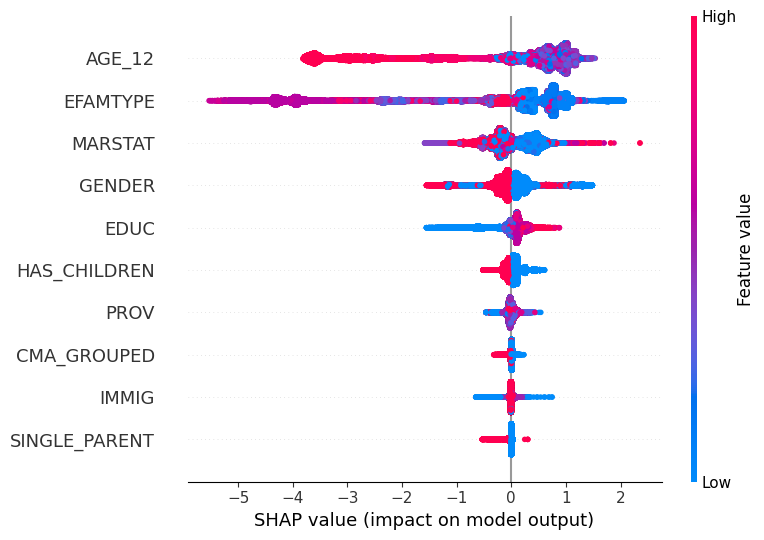

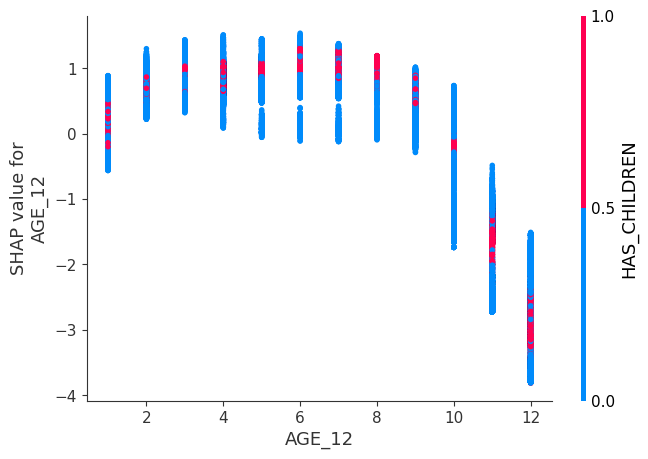

In [ ]:
import shap

# 2. Create Explainer
explainer = shap.TreeExplainer(model)

# 3. Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# 4. Summary Plot (global importance)
shap.summary_plot(shap_values, X_test)

# 5. Force Plot for Individual Prediction (one client)
# Pick one example (e.g., first one)
shap.initjs()
i = 0  # index of the client you want to explain
shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i])

# 6. Dependence Plot (example for top feature)
top_feature = X_test.columns[np.argmax(np.abs(shap_values).mean(0))]
shap.dependence_plot(top_feature, shap_values, X_test)


In [ ]:
# Example client data
client_data = {
    'AGE_12': 4,           # 25–29 years
    'GENDER': 2,           # Female
    'MARSTAT': 2,          # Married
    'PROV': 59,            # BC
    'EDUC': 5,             # Bachelor's degree
    'IMMIG': 2,            # Recent immigrant
    'EFAMTYPE': 2,         # Common family type (e.g., couple family without children)
    'HAS_CHILDREN': 1,
    'SINGLE_PARENT': 0,
    'CMA_GROUPED': 7       # Metro
}

# Predict employability probability
probability = model.predict_proba(pd.DataFrame([client_data]))[:, 1][0]
print(f"Employability Probability: {probability:.2f}")


Employability Probability: 0.79


In [ ]:
group, recommendation = map_employability(probability)

print(f"Prediction Summary:")
print(f"Employability Probability: {probability:.2%}")
print(f"Group: {group}")
print(f"Recommended Service: {recommendation}")

Prediction Summary:
Employability Probability: 78.78%
Group: High Employability
Recommended Service: Job Search Support (Resume, Interview Prep)
